In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt

In [2]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [3]:
image = cv2.imread("data/index_02.jpg")
base_image = image.copy()

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
cv2.imwrite("temp/index_gray.png", gray)

True

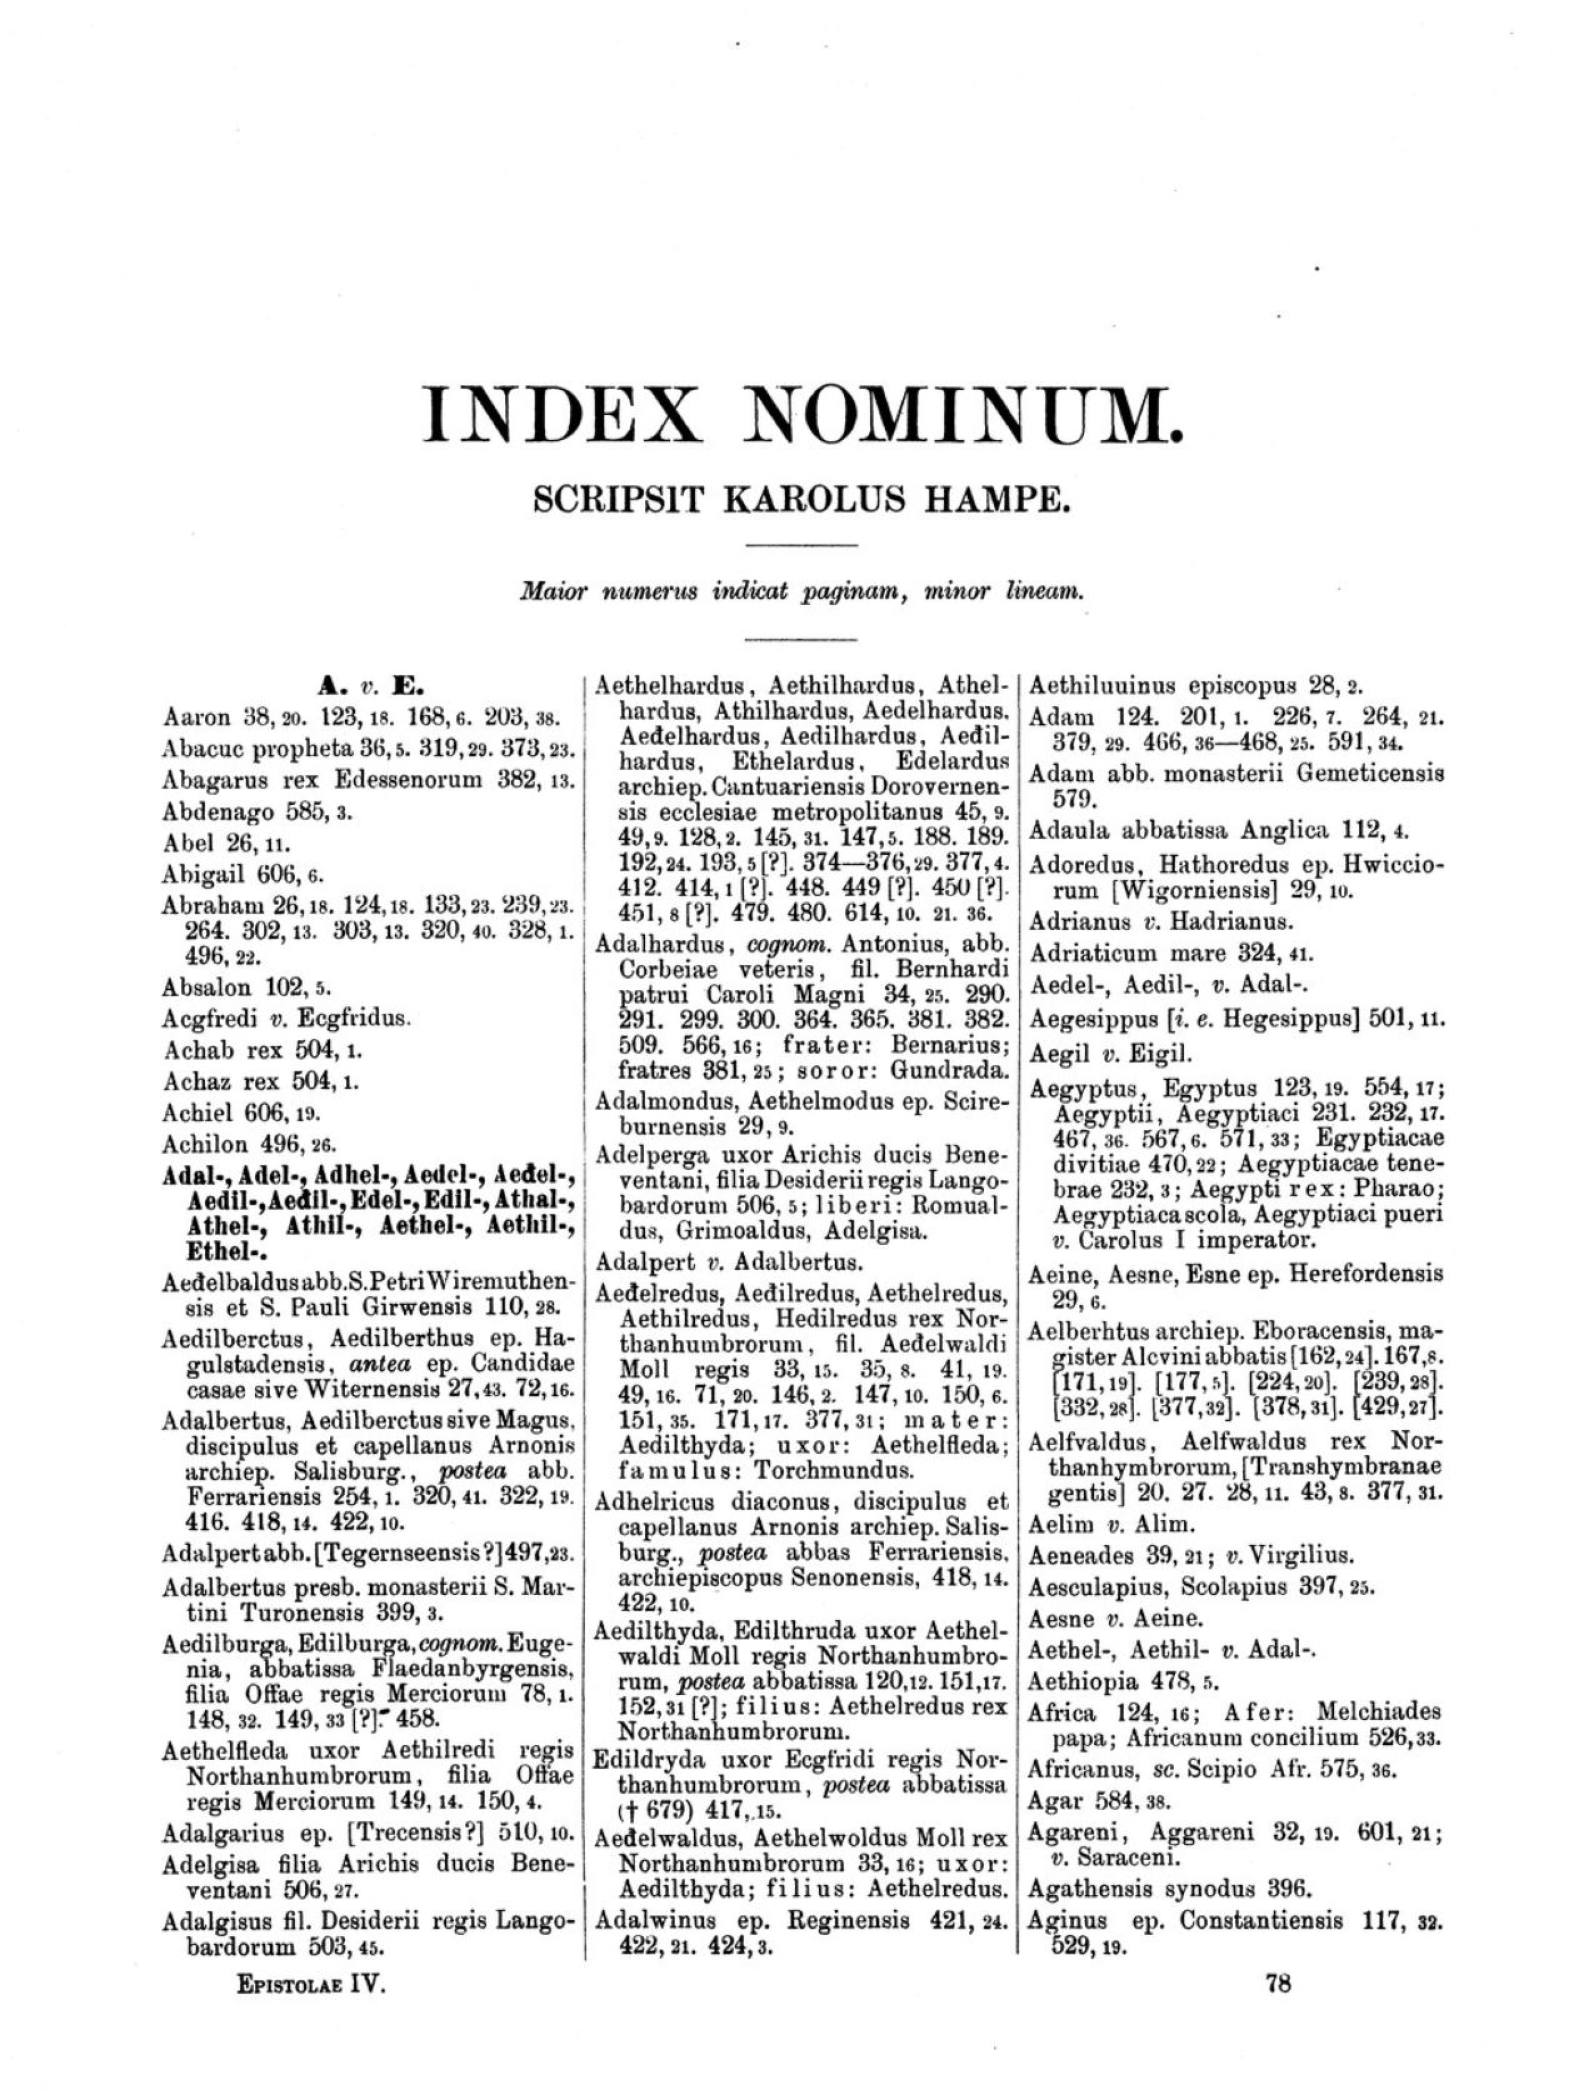

In [6]:
display("temp/index_gray.png")

In [7]:
blur = cv2.GaussianBlur(gray, (7,7), 0)

In [8]:
cv2.imwrite("temp/index_blur.png", blur)

True

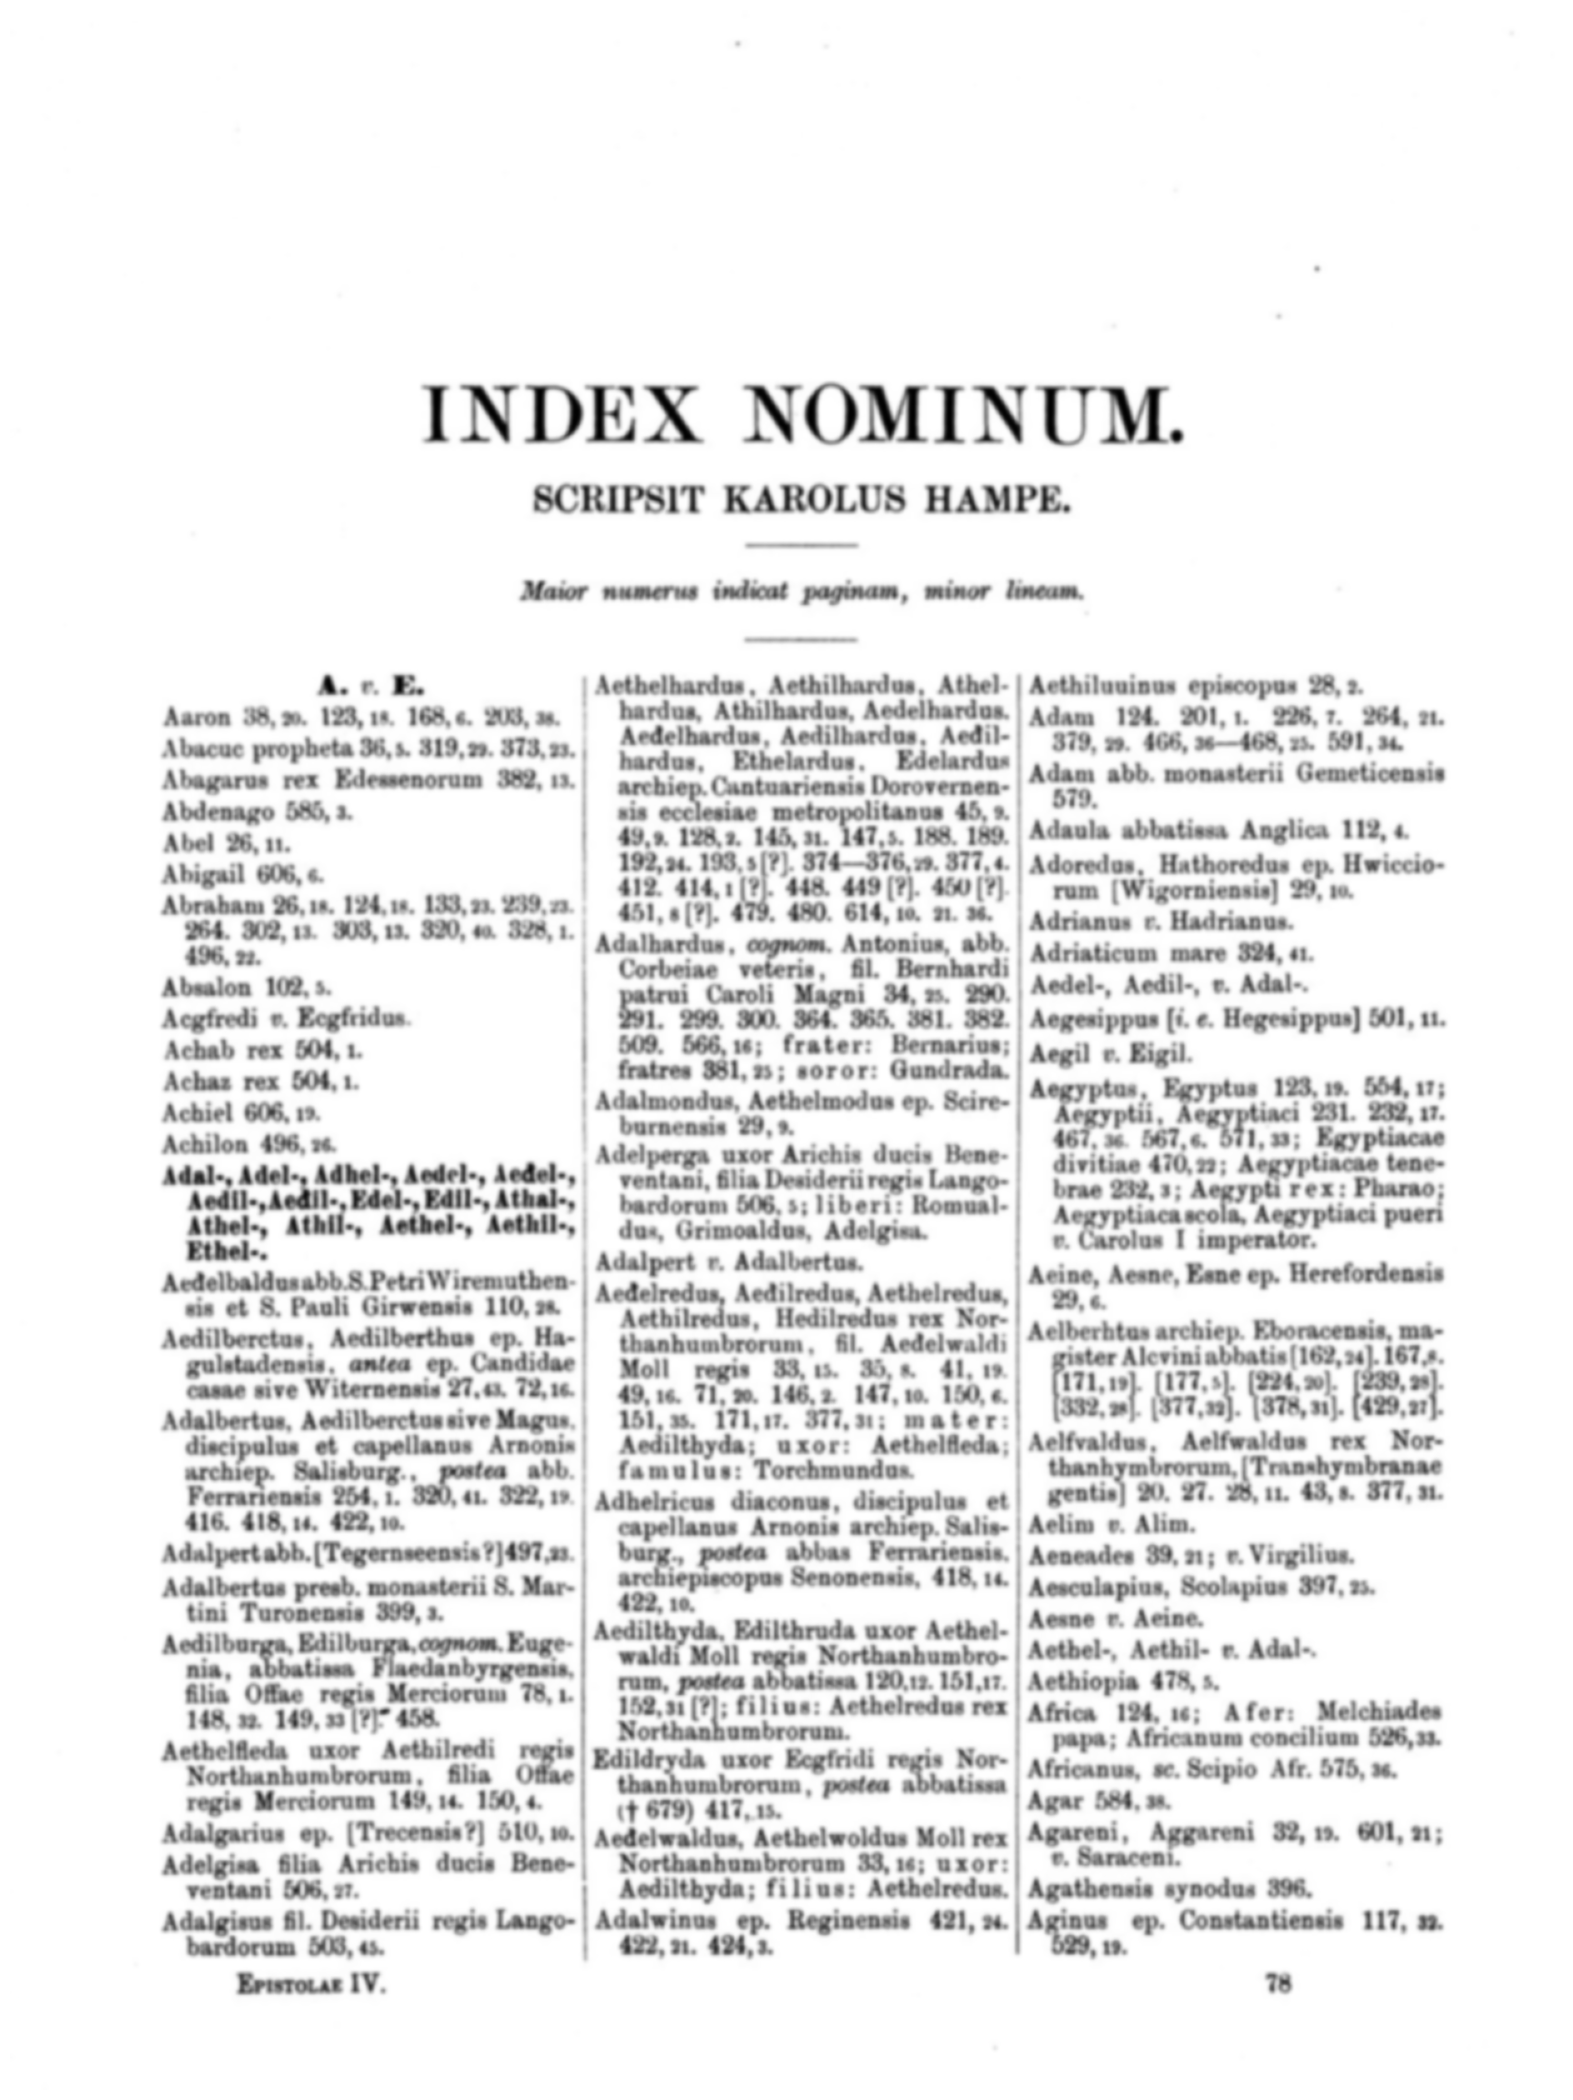

In [9]:
display("temp/index_blur.png")

In [10]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

In [11]:
cv2.imwrite("temp/index_thresh.png", thresh)

True

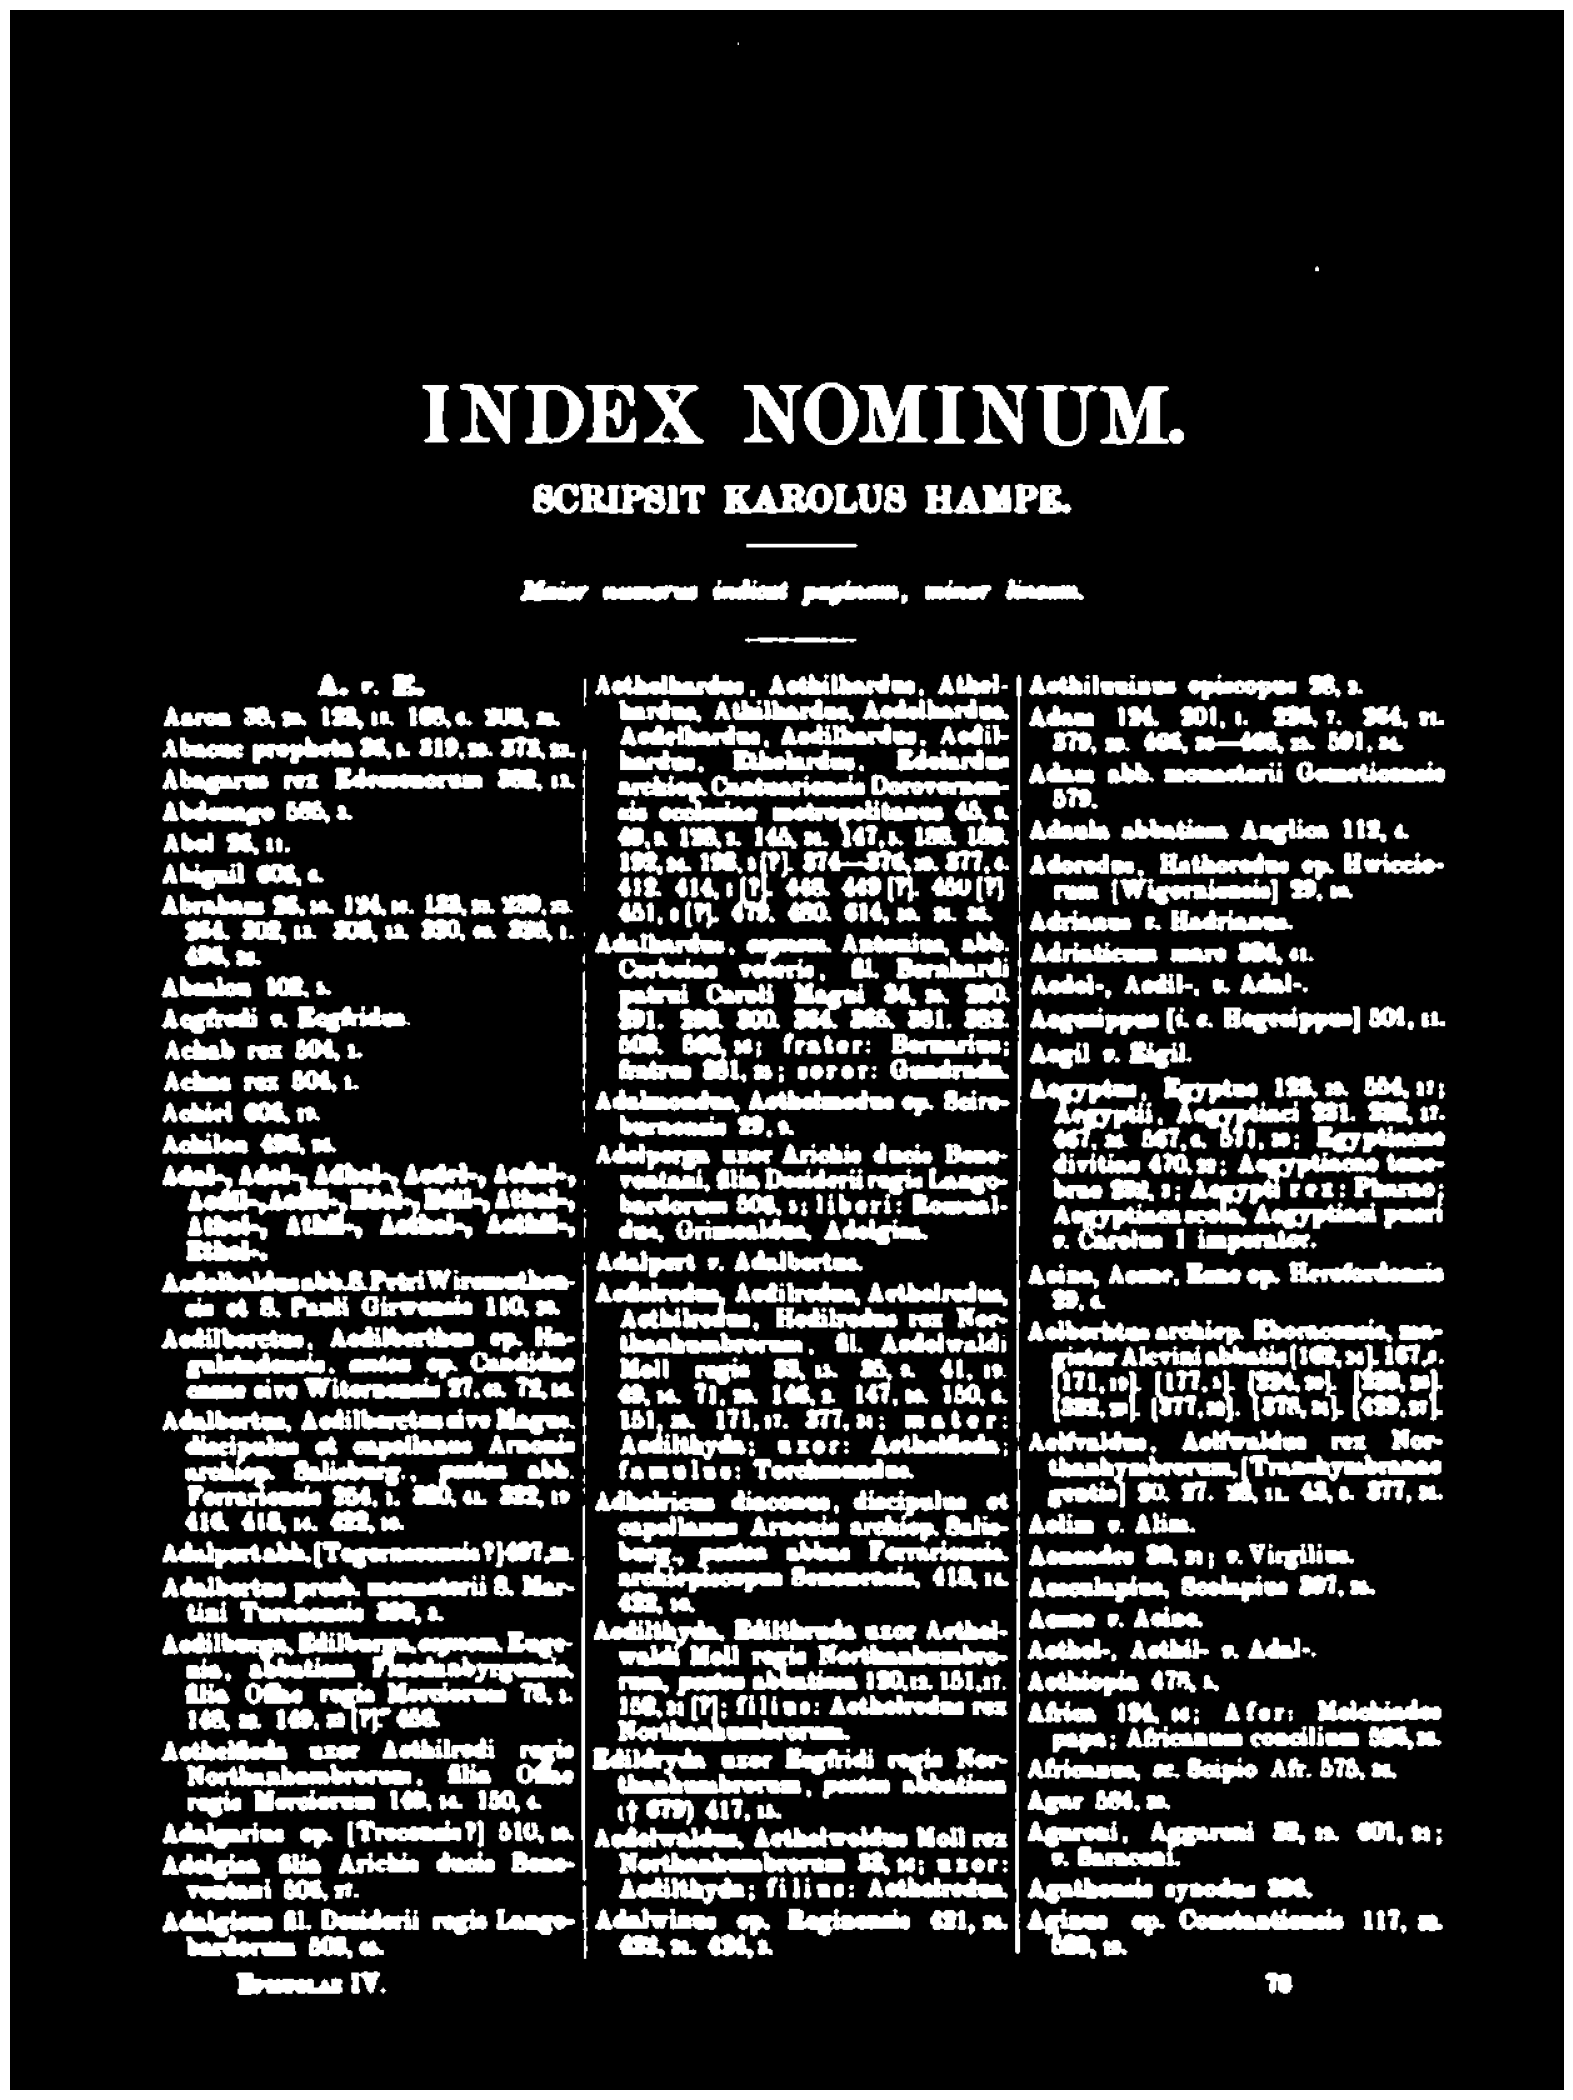

In [12]:
display("temp/index_thresh.png")

In [13]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))

In [14]:
cv2.imwrite("temp/index_kernel.png", kernel)

True

In [15]:
display("temp/index_kernel.png")

In [16]:
dilate = cv2.dilate(thresh, kernel, iterations = 1)

In [17]:
cv2.imwrite("temp/index_dilate.png", dilate)

True

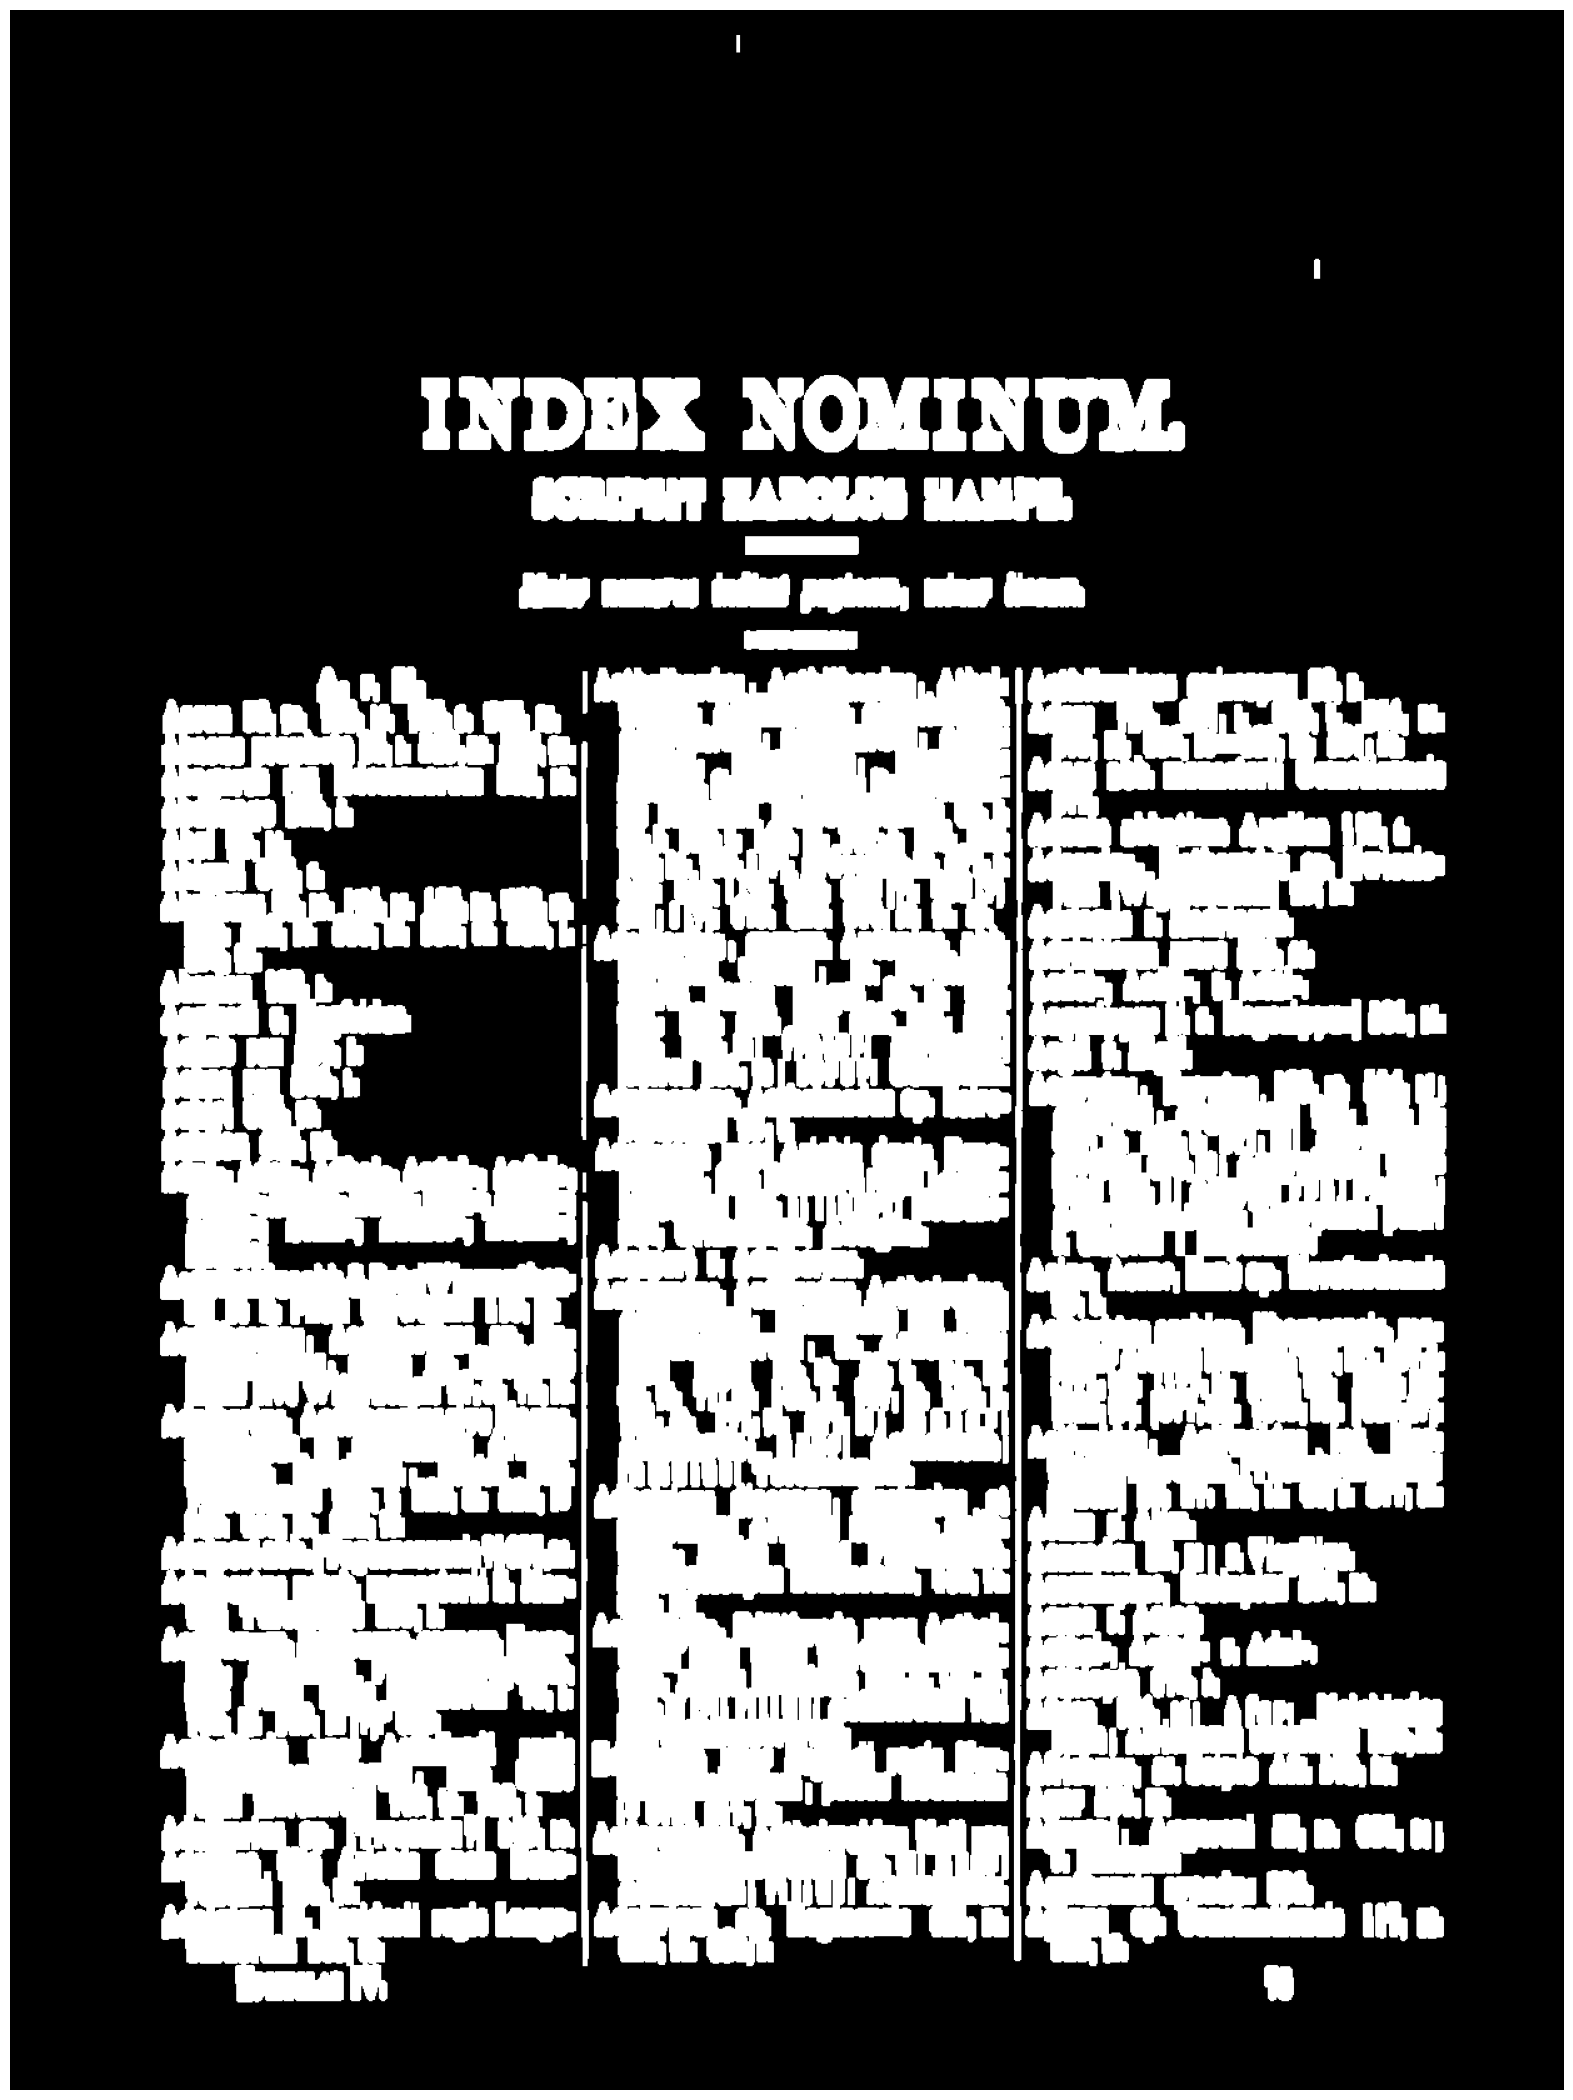

In [18]:
display("temp/index_dilate.png")

In [19]:
# cnts stands for contours

In [20]:
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [22]:
cnts = sorted(cnts, key = lambda x: cv2.boundingRect(x)[0])

In [30]:
results = []
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = image[y:y+h, x:x+h]
        cv2.rectangle(image, (x,y), (x+w,y+h), (36,255,12), 2)
        ocr_result = pytesseract.image_to_string(roi)
        ocr_result = ocr_result.split("\n")
        for item in ocr_result:
            results.append(item)
cv2.imwrite("temp/index_bbox.png", image)

True

In [31]:
print(results)

[' ', '', 'A. v. E.', '', 'Abdenago 585, 3.', '', 'Abel 26, 11.', '', 'Abigail 606, 6.', '', 'Abraham 26,18. 124,18. 133, 23.', '264. 302, 13. 303, 13. 320, 40.', '496, 22.', '', 'Absalon 102, 5.', '', 'Acgfredi v. Ecgtridus.', '', 'Achab rex 504, 1.', '', 'Achaz rex 504,1.', '', 'Achiel 606, 19.', '', 'Achilon 496, 26.', '', 'Adal-, Adel-, Adhel-, Aedel-, Aed', 'Aedil-,Acdil-, Edel-, Edil-, Ath', '', ' ', '', 'Ethel-.', '', '416. 418, 14. 422, 10.', '', 'tini Turonensis 399, 3.', 'Aedilbur,', 'nia, abbatissa', '148, 32. 149, 33 [2]7 458.', '', 'Aethelfleda uxor Aethilredi', '', 'Northanhumbrorum ,', 'regis Merciorum 149, 14. 150, 4.', '', 'ventani 506, 27.', '', 'bardorum 503, 45.', 'Epistozae IV.', '', ' ', '', '   ', '   ', '  ', '  ', '    ', '   ', '   ', '  ', '  ', '    ', '    ', '   ', '', 'Aaron 38, 20. 123, 18. 168,6. 203, 38. |)', 'Abacuc propheta 36,5. 319, 29. 373, 23.', 'Abagarus rex Edessenorum 382, 13.', '', '‘|||Adalhardus,', '', '   ', '  ', '   ', '  ', ' ', '', 'At

In [45]:
entities = []
for item in results:
    item = item.strip().replace("\n", "")
    item = item.split(" ")[0]
    if len(item) > 2:
        if item[0] == "A" and "-" not in item:
            item = item.split(".")[0].replace(",","").replace(";","")
            entities.append(item)

In [46]:
print(entities)

['Abdenago', 'Abel', 'Abigail', 'Abraham', 'Absalon', 'Acgfredi', 'Achab', 'Achaz', 'Achiel', 'Achilon', 'Aedilbur', 'Aethelfleda', 'Aaron', 'Abacuc', 'Abagarus', 'Aedelbaldusabb', 'Aedilberctus', 'Adalbertus', 'Adalpertabb', 'Adalbertus', 'Adalgarius', 'Adelgisa', 'Adalgisus', 'Aethelhardus', 'Aedelhardus', 'Adelperga', 'Aedelredus', 'Aethilredus', 'Aedilthyda', 'Aedelwaldus', 'Aedilthyda', 'Adalwinus', 'Aethiluuinus', 'Adam', 'Adam', 'Adaula', 'Adoredus', 'Adrianus', 'Adriaticum', 'Aegesippus', 'Aegil', 'Aegyptus', 'Aegyptiacascola', 'Aeine', 'Aelfvaldus', 'Aelim', 'Aesculapius', 'Aesne', 'Aethelhardus', 'Aedelhardus', 'Adalhardus', 'Adalmondus', 'Adelperga', 'Adalpert', 'Aedelredus', 'Aethilredus', 'Aedilthyda', 'Adhelricus', 'Aedilthyda', 'Aedelwaldus', 'Aedilthyda', 'Adalwinus', 'Aethiluuinus', 'Adam', 'Adam', 'Adaula', 'Adoredus', 'Adrianus', 'Adriaticum', 'Aegesippus', 'Aegil', 'Aegyptus', 'Aegyptiacascola', 'Aeine', 'Aelfvaldus', 'Aelim', 'Aesculapius', 'Aesne', 'Aethiluuinus',

In [47]:
entities = list(set(entities))

In [48]:
print(entities)

['Aethiluuinus', 'Africanus', 'Abigail', 'Adalwinus', 'Aedilthyda', 'Agareni', 'Achiel', 'Aginus', 'Adoredus', 'Aedelbaldusabb', 'Abel', 'Adalgarius', 'Aelberhtus', 'Aeneades', 'Adalbertus', 'Aethelhardus', 'Adriaticum', 'Aeine', 'Agathensis', 'Adalpert', 'Aethiopia', 'Aedelwaldus', 'Acgfredi', 'Adalhardus', 'Agar', 'Aegil', 'Aelim', 'Aaron', 'Aedelredus', 'Aegesippus', 'Adelperga', 'Abacuc', 'Aedilberctus', 'Aesne', 'Aedelhardus', 'Adaula', 'Abraham', 'Adrianus', 'Aelfvaldus', 'Adalmondus', 'Adhelricus', 'Aedilbur', 'Aethelfleda', 'Achilon', 'Adalgisus', 'Aegyptiacascola', 'Achaz', 'Aesculapius', 'Adam', 'Adelgisa', 'Abdenago', 'Achab', 'Africa', 'Abagarus', 'Aethilredus', 'Aegyptus', 'Adalpertabb', 'Absalon']


In [49]:
entities.sort()

In [50]:
print(entities)

['Aaron', 'Abacuc', 'Abagarus', 'Abdenago', 'Abel', 'Abigail', 'Abraham', 'Absalon', 'Acgfredi', 'Achab', 'Achaz', 'Achiel', 'Achilon', 'Adalbertus', 'Adalgarius', 'Adalgisus', 'Adalhardus', 'Adalmondus', 'Adalpert', 'Adalpertabb', 'Adalwinus', 'Adam', 'Adaula', 'Adelgisa', 'Adelperga', 'Adhelricus', 'Adoredus', 'Adrianus', 'Adriaticum', 'Aedelbaldusabb', 'Aedelhardus', 'Aedelredus', 'Aedelwaldus', 'Aedilberctus', 'Aedilbur', 'Aedilthyda', 'Aegesippus', 'Aegil', 'Aegyptiacascola', 'Aegyptus', 'Aeine', 'Aelberhtus', 'Aelfvaldus', 'Aelim', 'Aeneades', 'Aesculapius', 'Aesne', 'Aethelfleda', 'Aethelhardus', 'Aethilredus', 'Aethiluuinus', 'Aethiopia', 'Africa', 'Africanus', 'Agar', 'Agareni', 'Agathensis', 'Aginus']
